In [ ]:
!pip install matplotlib pandas numpy

In [21]:
import pandas as pd
from src.name_scoring import calculate_name_similarity
from src.date_scoring import calculate_date_similarity
%matplotlib inline

In [22]:
df = pd.read_csv('data/people.csv', names=['name_1', 'birth_date_1', 'name_2', 'birth_date_2'])
# df = df.sample(1000)

In [23]:
df.head()

,name_1,birth_date_1,name_2,birth_date_2
0,George Clooney,1980-01-01,Giorgi Clouni,1980-01-01
1,Brad Pitt,1985-12-12,Brad Pitt,1975-12-12
2,Matt Damon,1990-06-25,Mat Damon,1990-06-15
3,Al Pacino,1956-03-22,Al Pachino,1956-03-22
4,Adam Lazarre-White,1970-11-13,A.L. White,1970-11-13


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name_1        16 non-null     object
 1   birth_date_1  16 non-null     object
 2   name_2        16 non-null     object
 3   birth_date_2  16 non-null     object
dtypes: object(4)
memory usage: 640.0+ bytes


In [25]:
df.drop_duplicates(subset=['name_1', 'birth_date_1', 'name_2', 'birth_date_2'], inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name_1        16 non-null     object
 1   birth_date_1  16 non-null     object
 2   name_2        16 non-null     object
 3   birth_date_2  16 non-null     object
dtypes: object(4)
memory usage: 640.0+ bytes


In [27]:
def calculate_scores(f):
    name_score = calculate_name_similarity(f['name_1'], f['name_2'])
    year_score, month_score, day_score = calculate_date_similarity(f['birth_date_1'], f['birth_date_2'])
    return [name_score, year_score, month_score, day_score]

In [28]:
scores = df.apply(calculate_scores, axis='columns').apply(pd.Series)
scores

score: 0.8111, matches: [(0.8222222222222222, 'clooney', 'clouni'), (0.7999999999999999, 'george', 'giorgi')]
score: 0.8111, matches: [(0.8222222222222222, 'clooney', 'clouni'), (0.7999999999999999, 'george', 'giorgi')]
score: 1.0000, matches: [(1.0, 'brad', 'brad'), (1.0, 'pitt', 'pitt')]
score: 0.9708, matches: [(1.0, 'damon', 'damon'), (0.9416666666666667, 'matt', 'mat')]
score: 0.9833, matches: [(1.0, 'al', 'al'), (0.9666666666666667, 'pacino', 'pachino')]
score: 0.8393, matches: [(1.0, 'white', 'white'), (0.775, 'adam', 'a'), (0.7428571428571429, 'lazarre', 'l')]
score: 0.9179, matches: [(0.9875, 'jemison', 'jemisone'), (0.8483333333333334, 'eddie', 'eddy')]
score: 0.9000, matches: [(1.0, 'cheadle', 'cheadle'), (0.7999999999999999, 'don', 'd')]
score: 0.8500, matches: [(1.0, 'gakharia', 'gakharia'), (0.7, 'george', 'gio')]
score: 0.7778, matches: [(1.0, 'pheradze', 'pheradze'), (0.9444444444444444, 'marine', 'marina')]
score: 0.7889, matches: [(1.0, 'mouravi', 'mouravi'), (0.97222

,0,1,2,3
0,0.811111,1.000000,1.0,1.000000
1,1.000000,0.833333,1.0,1.000000
2,0.970833,1.000000,1.0,0.666667
3,0.983333,1.000000,1.0,1.000000
4,0.839286,1.000000,1.0,1.000000
5,0.917917,0.833333,1.0,1.000000
6,0.900000,1.000000,1.0,1.000000
7,0.850000,1.000000,1.0,1.000000
8,0.777778,1.000000,1.0,1.000000
9,0.788889,1.000000,1.0,1.000000


In [29]:
scores.rename({0: 'name_score', 1: 'year_score', 2: 'month_score', 3: 'day_score'}, axis='columns', inplace=True)

In [30]:
new_df = pd.concat([df, scores], axis='columns')

In [31]:
new_df['avg_score'] = new_df.apply(lambda f: (f['name_score'] + f['year_score'] + f['month_score'] + f['day_score'])/4, axis='columns')

In [32]:
new_df['bd_score'] = new_df.apply(lambda f: (f['year_score'] + f['month_score'] + f['day_score'])/3, axis='columns')

In [33]:
new_df['score'] = new_df.apply(lambda f: (f['name_score'] + f['bd_score'])/2, axis='columns')

In [35]:
# new_df.drop_duplicates(subset=['name_score', 'year_score', 'month_score', 'day_score'], inplace=True)
new_df.drop(['year_score', 'month_score', 'day_score', 'bd_score'], axis='columns')

,name_1,birth_date_1,name_2,birth_date_2,name_score,avg_score,score
0,George Clooney,1980-01-01,Giorgi Clouni,1980-01-01,0.811111,0.952778,0.905556
1,Brad Pitt,1985-12-12,Brad Pitt,1975-12-12,1.000000,0.958333,0.972222
2,Matt Damon,1990-06-25,Mat Damon,1990-06-15,0.970833,0.909375,0.929861
3,Al Pacino,1956-03-22,Al Pachino,1956-03-22,0.983333,0.995833,0.991667
4,Adam Lazarre-White,1970-11-13,A.L. White,1970-11-13,0.839286,0.959821,0.919643
5,Eddie Jemison,1978-02-14,Eddy Jemisone,1988-02-14,0.917917,0.937813,0.931181
6,Mr. Don Cheadle,2000-05-16,D. Cheadle,2000-05-16,0.900000,0.975000,0.950000
7,George Gakharia,1976-05-06,გიო გახარია,1976-05-06,0.850000,0.962500,0.925000
8,მარინე გიორგის ასული ფერაძე,1945-02-03,მარინა ფერაძე,1945-02-03,0.777778,0.944444,0.888889
9,დავით თარხან-მოურავი,1957-12-24,დავითი მოურავი,1957-12-24,0.788889,0.947222,0.894444


In [38]:
new_df[(new_df['score'] > 0.9) & (new_df['score'] <= 1)].drop(['year_score', 'month_score', 'day_score', 'bd_score'], axis='columns')

,name_1,birth_date_1,name_2,birth_date_2,name_score,avg_score,score
0,George Clooney,1980-01-01,Giorgi Clouni,1980-01-01,0.811111,0.952778,0.905556
1,Brad Pitt,1985-12-12,Brad Pitt,1975-12-12,1.000000,0.958333,0.972222
2,Matt Damon,1990-06-25,Mat Damon,1990-06-15,0.970833,0.909375,0.929861
3,Al Pacino,1956-03-22,Al Pachino,1956-03-22,0.983333,0.995833,0.991667
4,Adam Lazarre-White,1970-11-13,A.L. White,1970-11-13,0.839286,0.959821,0.919643
5,Eddie Jemison,1978-02-14,Eddy Jemisone,1988-02-14,0.917917,0.937813,0.931181
6,Mr. Don Cheadle,2000-05-16,D. Cheadle,2000-05-16,0.900000,0.975000,0.950000
7,George Gakharia,1976-05-06,გიო გახარია,1976-05-06,0.850000,0.962500,0.925000
10,ალექსანდრე ლორთქიფანიძე,2000-01-01,ალექსი ლორთქიპანიძე,2000-01-01,0.940873,0.985218,0.970437
11,გივი გივი სიხარულიძე,1944-10-01,გ.სიხარულიძე,1944-10-01,0.887500,0.971875,0.943750


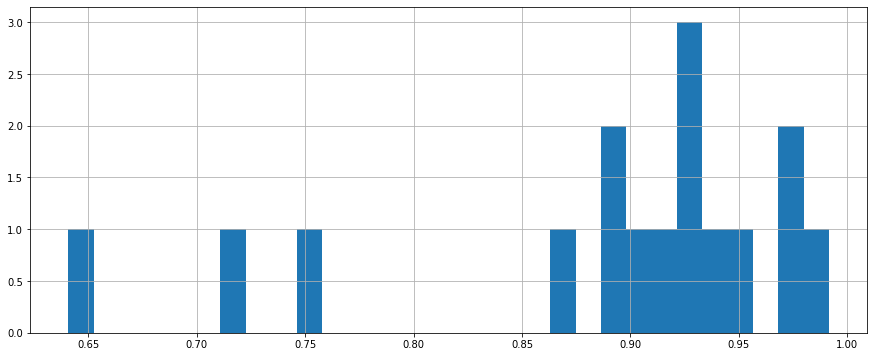

In [39]:
new_df['score'].hist(bins=30, figsize=(15, 6));

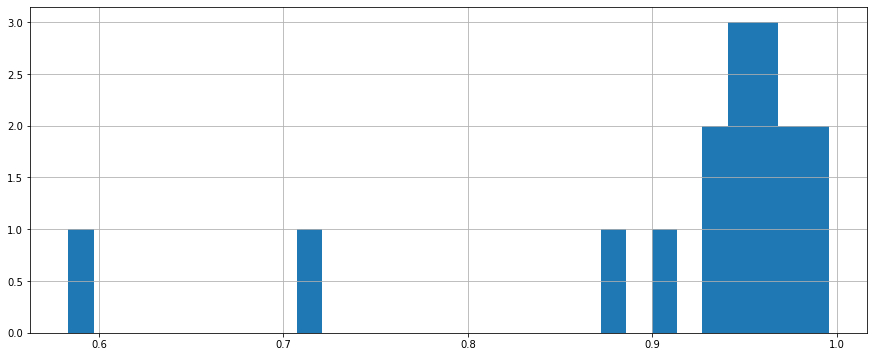

In [40]:
new_df['avg_score'].hist(bins=30, figsize=(15, 6));